[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/da-python/python-for-data-analytics/blob/main/Lesson3/hometask/SyntheticRubber.ipynb)

In [1]:
##### При работе в Colab
!pip install yfinance

You should consider upgrading via the 'C:\Users\79216\PycharmProjects\python-for-data-analytics\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from tqdm.auto import tqdm

In [3]:
# Для работы с API может потребоваться обходное решение для работы с SSL сертификатом
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании.
* Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании.
* Ваши клиенты предпочитают формульный подход к ценообразованию и вам нужно предложить клиентам формулу цены на синтетический каучук, который может быть альтернативой натуральному каучуку с грейдом SMR 20.
* В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


### Что нужно сделать?

1. Проанализировать имеющиеся данные.
2. Определить базовую формулу цены на условиях FCA (цена на заводе). То есть как бы выглядела цена на исторических данных.
3. Отобразить на графике.
4. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
5. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента…

In [4]:
# Из данных есть:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии)
# location - локация клиента
# volumes - закупаемые объемы
# formula - предпочитаемая формула расчета цены - скользящая средняя или среднее значение за месяц

customers = {
    'Monty':{
        'location':'EU',
        'volumes':200,
        'formula':'moving_average'
    },

    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'formula': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'formula': 'moving_average'
    },
    'Poly':{
        'location':'EU',
        'volumes': 70,
        'formula': 'monthly'
    }
}
# Скидки
discounts = {'up to 100': 0.01, # 1%
             'up to 300': 0.05, # 5%
             '300 plus': 0.1}   #10%


In [8]:
!pip install requests

You should consider upgrading via the 'C:\Users\79216\PycharmProjects\python-for-data-analytics\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [9]:
import requests

In [10]:
all_dfs = []
for y in tqdm(['2020','2021','2022']):
    for m in tqdm(['01','02','03','04','05','06','07','08','09','10','11','12']):
        url = f"https://www.lgm.gov.my/webv2api/api/rubberprice/month={m}&year={y}"
        res = requests.get(url)
        rj = res.json()
        temp_df = pd.json_normalize(rj)
        all_dfs.append(temp_df)
df = pd.concat(all_dfs)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

In [11]:
df

,date,grade,masa,rm,us,tone
0,2020-01-31,SMR CV,Noon,767.50,190.70,Quiet
1,2020-01-31,SMR L,Noon,757.50,188.20,Quiet
2,2020-01-31,SMR 5,Noon,562.50,139.75,Quiet
3,2020-01-31,SMR GP,Noon,559.50,139.00,Quiet
4,2020-01-31,SMR 10,Noon,552.50,137.25,Quiet
...,...,...,...,...,...,...
58,2022-08-01,SMR 5,Noon,680.50,155.45,Quiet
59,2022-08-01,SMR GP,Noon,677.50,154.80,Quiet
60,2022-08-01,SMR 10,Noon,670.50,153.20,Quiet
61,2022-08-01,SMR 20,Noon,668.50,152.75,Quiet


In [12]:
#выясняем среднюю цену за месяц
df_smr20 = df[df['grade'] == 'SMR 20']
df_smr20.date = pd.to_datetime(df_smr20.date)
df_smr20['us'] = df_smr20['us'].astype('float')
df_smr20.set_index('date', inplace = True)
df_smr20 = df_smr20.us.copy()
df_smr20 = df_smr20.resample('M').mean()

C:\Users\79216\AppData\Local\Temp\ipykernel_17948\3021535099.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smr20.date = pd.to_datetime(df_smr20.date)
C:\Users\79216\AppData\Local\Temp\ipykernel_17948\3021535099.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_smr20['us'] = df_smr20['us'].astype('float')


In [14]:
df_smr20

date
2020-01-31    146.960000
2020-02-29    134.165000
2020-03-31    122.436364
2020-04-30    110.319048
2020-05-31    110.046875
2020-06-30    115.102381
2020-07-31    118.638636
2020-08-31    130.752632
2020-09-30    136.850000
2020-10-31    152.311905
2020-11-30    156.500000
2020-12-31    157.611905
2021-01-31    158.397368
2021-02-28    169.161765
2021-03-31    175.245652
2021-04-30    164.717500
2021-05-31    169.091176
2021-06-30    164.507143
2021-07-31    164.321429
2021-08-31    172.667500
2021-09-30    163.226190
2021-10-31    174.385000
2021-11-30    175.645238
2021-12-31    172.076190
2022-01-31    178.118421
2022-02-28    179.841667
2022-03-31    175.178261
2022-04-30    171.152632
2022-05-31    162.808333
2022-06-30    164.145238
2022-07-31    158.832500
2022-08-31    153.088889
Freq: M, Name: us, dtype: float64

In [17]:
#подтягиваем курсы валют для конвертации
df_dict = {}
df_dict['SMR_20_PRICE'] = df_smr20
for ticker in ['EURUSD=X', 'USDEUR=X']:
    df = yf.download(ticker)
    df = df.Close.copy()
    df = df.resample('M').mean()
    df_dict[ticker] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [18]:
df_dict

{'SMR_20_PRICE': date
 2020-01-31    146.960000
 2020-02-29    134.165000
 2020-03-31    122.436364
 2020-04-30    110.319048
 2020-05-31    110.046875
 2020-06-30    115.102381
 2020-07-31    118.638636
 2020-08-31    130.752632
 2020-09-30    136.850000
 2020-10-31    152.311905
 2020-11-30    156.500000
 2020-12-31    157.611905
 2021-01-31    158.397368
 2021-02-28    169.161765
 2021-03-31    175.245652
 2021-04-30    164.717500
 2021-05-31    169.091176
 2021-06-30    164.507143
 2021-07-31    164.321429
 2021-08-31    172.667500
 2021-09-30    163.226190
 2021-10-31    174.385000
 2021-11-30    175.645238
 2021-12-31    172.076190
 2022-01-31    178.118421
 2022-02-28    179.841667
 2022-03-31    175.178261
 2022-04-30    171.152632
 2022-05-31    162.808333
 2022-06-30    164.145238
 2022-07-31    158.832500
 2022-08-31    153.088889
 Freq: M, Name: us, dtype: float64,
 'EURUSD=X': Date
 2003-12-31    1.231372
 2004-01-31    1.260813
 2004-02-29    1.264357
 2004-03-31    1.226

In [19]:
#создаем основной df и выбираем период с 1 января 20 по 30 июня 22
main_df = pd.concat(df_dict.values(), axis=1)
main_df.columns = ['SMR_20_PRICE','EURUSD=X', 'USDEUR=X']
main_df = main_df.loc['2020-01-01':'2022-06-30'].copy()

In [20]:
#цена на заводе в долларах
main_df['SMR_20_PRICE_USD'] = main_df['SMR_20_PRICE'] + PRODUCTION_COST * main_df['EURUSD=X']
#цена на заводе в евро
main_df['SMR_20_PRICE_EUR'] = main_df['SMR_20_PRICE'] * main_df['USDEUR=X'] + PRODUCTION_COST
#средняя цена при доставке в еврозону
main_df['SMR_20_PRICE_EUR_EU'] = main_df['SMR_20_PRICE_EUR'] + EU_LOGISTIC_COST_EUR
#средняя цена при доставке в Китай
main_df['SMR_20_PRICE_USD_CN'] = main_df['SMR_20_PRICE_USD'] + CN_LOGISTIC_COST_USD
#плавающая средняя цена при доставке в еврозону
main_df['SMR_20_PRICE_EUR_EU_MA'] = main_df.SMR_20_PRICE_EUR_EU.rolling(window=3).mean()
#плавающая средняя цена при доставке в китай
main_df['SMR_20_PRICE_USD_CN_MA'] = main_df.SMR_20_PRICE_USD_CN.rolling(window=3).mean()

In [21]:
main_df

,SMR_20_PRICE,EURUSD=X,USDEUR=X,SMR_20_PRICE_USD,SMR_20_PRICE_EUR,SMR_20_PRICE_EUR_EU,SMR_20_PRICE_USD_CN,SMR_20_PRICE_EUR_EU_MA,SMR_20_PRICE_USD_CN_MA
2020-01-31,146.960000,1.111180,0.899972,591.432110,532.259821,562.259821,721.432110,NaN,NaN
2020-02-29,134.165000,1.091091,0.916576,570.601269,522.972372,552.972372,700.601269,NaN,NaN
2020-03-31,122.436364,1.107309,0.903398,565.359812,510.608815,540.608815,695.359812,551.947003,705.797730
2020-04-30,110.319048,1.087575,0.919506,545.349051,501.439027,531.439027,675.349051,541.673405,690.436711
2020-05-31,110.046875,1.089994,0.917481,546.044420,500.965932,530.965932,676.044420,534.337925,682.251094
2020-06-30,115.102381,1.125652,0.888404,565.363317,502.257379,532.257379,695.363317,531.554113,682.252263
2020-07-31,118.638636,1.145476,0.873241,576.828839,503.600101,533.600101,706.828839,532.274471,692.745525
2020-08-31,130.752632,1.182762,0.845496,603.857438,510.550839,540.550839,733.857438,535.469440,712.016531
2020-09-30,136.850000,1.179660,0.847742,608.714143,516.013480,546.013480,738.714143,540.054807,726.466807
2020-10-31,152.311905,1.176977,0.849648,623.102664,529.411490,559.411490,753.102664,548.658603,741.891415


In [22]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,7

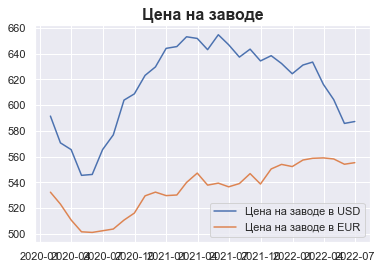

In [29]:
plt.title('Цена на заводе', fontsize=16, fontweight='bold')
plt.plot(main_df['SMR_20_PRICE_USD'], label='Цена на заводе в USD')
plt.plot(main_df['SMR_20_PRICE_EUR'], label='Цена на заводе в EUR')
plt.legend()
plt.show()

In [30]:
customers

{'Monty': {'location': 'EU', 'volumes': 200, 'formula': 'moving_average'},
 'Triangle': {'location': 'CN', 'volumes': 30, 'formula': 'monthly'},
 'Stone': {'location': 'EU', 'volumes': 150, 'formula': 'moving_average'},
 'Poly': {'location': 'EU', 'volumes': 70, 'formula': 'monthly'}}

In [31]:
discounts = {100: 0.01, 300: 0.05, 301: 0.1}

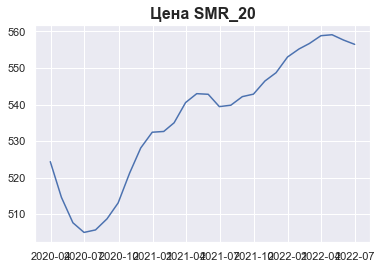

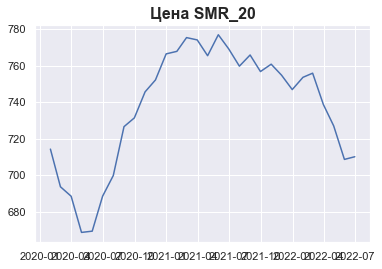

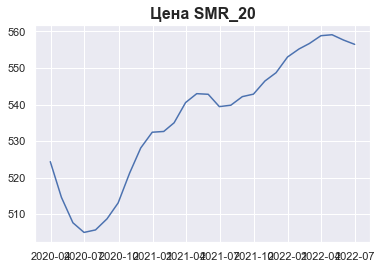

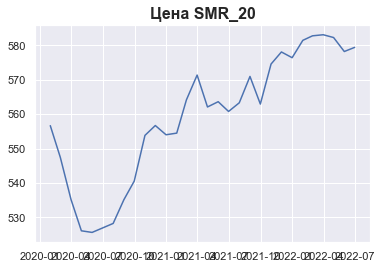

In [32]:
with pd.ExcelWriter('price_proposals.xlsx', engine = 'xlsxwriter') as writer:
    for client, v in customers.items():

        disc = 0.0
        if v.get('location') == "EU":
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('formula') == 'monthly':
                client_price = main_df['SMR_20_PRICE_EUR_EU'] * (1-disc)
            elif v.get('formula') == 'moving_average':
                client_price = main_df['SMR_20_PRICE_EUR_EU_MA'] * (1-disc)

        elif v.get('location') == 'CN':
            fl = 0
            for k_lim, discount_share in discounts.items():
                if v.get('volumes') > k_lim:
                    continue
                else:
                    disc = discount_share
                    fl = 1
                    break
            if fl == 0 :
                disc = discounts.get(max(discounts.keys()))

            if v.get('formula') == 'monthly':
                client_price = main_df['SMR_20_PRICE_USD_CN'] * (1-disc)
            elif v.get('formula') == 'moving_average':
                client_price = main_df['SMR_20_PRICE_USD_CN_MA'] * (1-disc)


        # print(client, v, disc)
        client_price.to_excel(writer, sheet_name=client)
        # Добавляем график с ценой
        plot_path = f'{client}_wbp.png'
        plt.title('Цена SMR_20', fontsize=16, fontweight='bold')
        plt.plot(client_price)
        plt.savefig(plot_path)
        plt.show()
        # worksheet = writer.sheets[client]
        # worksheet.insert_image('C2',plot_path)

    for k,v in customers.items():
        worksheet = writer.sheets[k]
        worksheet.insert_image('C2',f"{k}_wbp.png")

for k,v in customers.items():
    if os.path.exists(f"{k}_wbp.png"):
        os.remove(f"{k}_wbp.png")

# Задание 2. Продолжение

Клиенты согласились на ваше предложение.
### Что нужно сделать?
Вам нужно написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно.



* В результате должен быть скрипт, который делает расчет цены для клиента (чтобы данные подтягивались туда сами)

# Задание 3. Поделись с ближним

Вы решили пойти в отпуск на время вашего отсутствия вас будет заменять коллега. Он будет заниматься рассчетом цен для клиентов. Чтобы ему было проще вам нужно завернуть ваши скрипты в модуль, который будет запускать у себя коллега.

### Что нужно сделать?
* Создайте модуль, который можно запускать в ноутбуке подкладывая в ту же директорию
* Хорошенько задокументируйте ВСЁ
* Помните о PEP8

In [3]:
# import yourpackage

# Задание 4. Поделись пакетом

Ваши коллеги узнали, что вы быстро рассчитываете цены для формульных контрактов, и решили использовать такую же практику для своих продуктов и клиентов. Вам нужно создать пакет, чтобы его было проще устанавливать и использовать.

### Что нужно сделать?
* Создайте отдельный пакет, который можно устанавливать с помощью pip
* В пакете должны быть реализованы функции для рассчета цен по формульным контрактам
* Выложите пакет в свой репозиторий

In [ ]:
# !pip install yourpackage
# import yourpackage